<a href="https://colab.research.google.com/github/ritamiitism/LearningML/blob/main/hp_tuning_in_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.corr()["Outcome"]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [ ]:
x= data.iloc[:,:-1].values;
y=data.iloc[:,-1].values;

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
x=scaler.fit_transform(x);
x.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model =Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6213 - loss: 0.6687   
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6448 - loss: 0.6322 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6849 - loss: 0.5923 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5600 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7137 - loss: 0.5351 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7512 - loss: 0.5136 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7253 - loss: 0.5277 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7497 - loss: 0.4946 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7370 - loss: 0.5026 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7677 - loss: 0.4659 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7604 - loss: 0.4793 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
pip install -U keras-tuner


In [ ]:
import kerastuner as kt

In [ ]:
from keras import regularizers
from keras.regularizers import l2

def build_model(hp):
  model=Sequential()
  counter=0
  num_layers = hp.Int('num_layers', min_value=1, max_value=10)

  for i in range(num_layers):
    if counter == 0:
      model.add(Dense(
          hp.Int('units_'+str(i),min_value=8,max_value=128,step=8),
          activation=hp.Choice('activation_'+str(i),values=['relu','tanh','elu','sigmoid']),
          input_dim=8,
          kernel_regularizer=l2(hp.Choice('l2_'+str(i), values=[1e-4, 1e-3, 1e-2]))
      ))
    else:
      model.add(Dense(
          hp.Int('units_'+str(i),min_value=8,max_value=128,step=8),
          activation=hp.Choice('activation_'+str(i),values=['relu','tanh','elu','sigmoid']),
          kernel_regularizer=l2(hp.Choice('l2_'+str(i), values=[1e-4, 1e-3, 1e-2]))
      ))

    model.add(Dropout(hp.Choice('dropout'+str(i),
                                values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    counter+=1

  model.add(Dense(1,activation='sigmoid'))
  optimizer_choice = hp.Choice('optimizer',values=['rmsprop','adam','sgd','adadelta'])
  model.compile(optimizer=optimizer_choice,loss='binary_crossentropy',metrics=['accuracy'])

  return model


In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='final')



Reloading Tuner from mydir/final/tuner0.json


In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units_0': 104,
 'activation_0': 'tanh',
 'optimizer': 'rmsprop',
 'units_1': 112,
 'activation_1': 'tanh',
 'units_2': 16,
 'activation_2': 'elu',
 'units_3': 128,
 'activation_3': 'relu',
 'units_4': 64,
 'activation_4': 'relu',
 'units_5': 56,
 'activation_5': 'elu',
 'l2_0': 0.0001,
 'dropout0': 0.1,
 'l2_1': 0.0001,
 'dropout1': 0.1,
 'l2_2': 0.0001,
 'dropout2': 0.1,
 'l2_3': 0.0001,
 'dropout3': 0.1}

In [ ]:
tuner.results_summary()


Results summary
Results in mydir/final
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_layers: 4
units_0: 104
activation_0: tanh
optimizer: rmsprop
units_1: 112
activation_1: tanh
units_2: 16
activation_2: elu
units_3: 128
activation_3: relu
units_4: 64
activation_4: relu
units_5: 56
activation_5: elu
l2_0: 0.0001
dropout0: 0.1
l2_1: 0.0001
dropout1: 0.1
l2_2: 0.0001
dropout2: 0.1
l2_3: 0.0001
dropout3: 0.1
Score: 0.8246753215789795

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 80
activation_0: tanh
optimizer: rmsprop
units_1: 128
activation_1: relu
units_2: 112
activation_2: relu
units_3: 8
activation_3: relu
units_4: 8
activation_4: relu
units_5: 8
activation_5: relu
Score: 0.8181818127632141

Trial 3 summary
Hyperparameters:
num_layers: 4
units_0: 32
activation_0: elu
optimizer: sgd
units_1: 88
activation_1: tanh
units_2: 8
activation_2: tanh
units_3: 16
activation_3: relu
units_4: 104
activation_4: relu
units_5

In [ ]:
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
from keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor='val_accuracy',
    patience=20,
    restore_best_weights=True
)


In [252]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=callback)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9655 - loss: 0.1501 - val_accuracy: 0.7468 - val_loss: 1.0817
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9515 - loss: 0.1524 - val_accuracy: 0.7727 - val_loss: 1.0917
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9515 - loss: 0.1687 - val_accuracy: 0.7727 - val_loss: 1.0976
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.1501 - val_accuracy: 0.7532 - val_loss: 1.0979
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9570 - loss: 0.1785 - val_accuracy: 0.7662 - val_loss: 1.0826
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9545 - loss: 0.1515 - val_accuracy: 0.7597 - val_loss: 1.0907
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9396 - loss: 0.1888 - val_accuracy: 0.7727 - val_loss: 1.0277
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9656 - loss: 0.1265 - val_accuracy: 0.7403 -

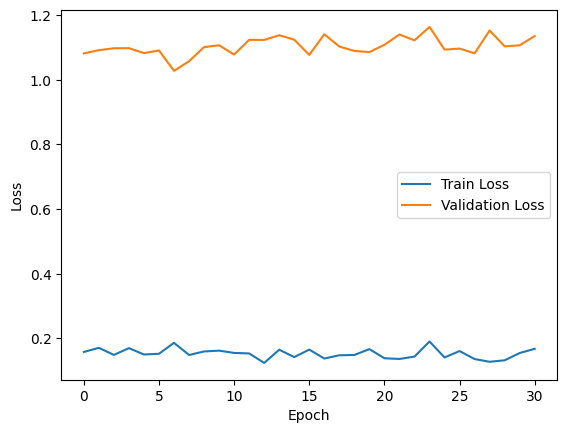

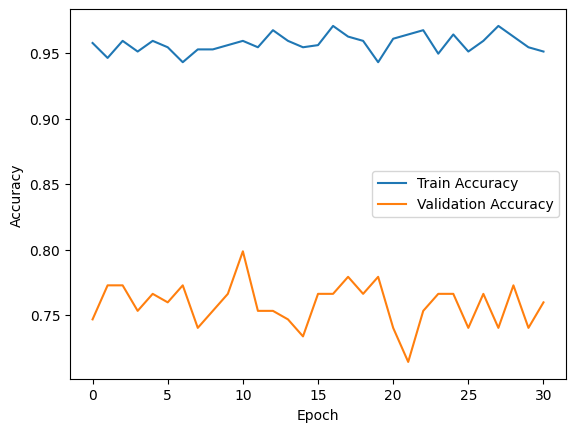

In [253]:
import matplotlib.pyplot as plt

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
